# Análisis del dataset Glass Identification
El conjunto de datos utilizado corresponde al **Glass Identification Dataset**, el cual contiene información química y física de diferentes tipos de vidrio. El objetivo del dataset es clasificar cada muestra en uno de los tipos de vidrio definidos, a partir de sus características de composición.

## Etapa 1: Entendimiento / Conocimiento de los Datos

### Carga el entorno y archivos

In [ ]:
# Verificación de archivos
import os
os.listdir('/content')

['.config', 'Index', 'glass.data', 'glass.names', 'glass.tag', 'sample_data']

In [ ]:
#Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



### Cargar el conjunto de datos

In [ ]:
df = pd.read_csv('/content/glass.data', header=None, names=columnas)
df.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


El conjunto de datos Glass Identification contiene información química de diferentes tipos de vidrio.
Cada registro corresponde a una muestra de vidrio caracterizada por nueve atributos de entrada y un atributo objetivo que indica el tipo de vidrio.


### 1.1 Identificar número de muestras y atributos

In [ ]:
print("Número de muestras (filas):", df.shape[0])
print("Número de atributos (columnas):", df.shape[1])


Número de muestras (filas): 214
Número de atributos (columnas): 11


El dataset está compuesto por 214 muestras y 10 atributos, de los cuales 9 corresponden a variables de entrada y uno al atributo objetivo.


### 1.2 Identificar el tipo de cada atributo

In [ ]:
df.dtypes


,0
RI,float64
Na,float64
Mg,float64
Al,float64
Si,float64
K,float64
Ca,float64
Ba,float64
Fe,float64
Type,int64


Todos los atributos son de tipo numérico.
El atributo Type, aunque está representado numéricamente, corresponde a una variable categórica que identifica la clase del vidrio.


### 1.3 Calcular medidas de centralidad y dispersión por cada atributo

In [ ]:
df.describe()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Se calcularon estadísticas descriptivas para analizar la tendencia central y dispersión de los atributos, incluyendo media, desviación estándar y cuartiles.


### 1.4 Hacer gráfico de cajas y bigotes por atributo

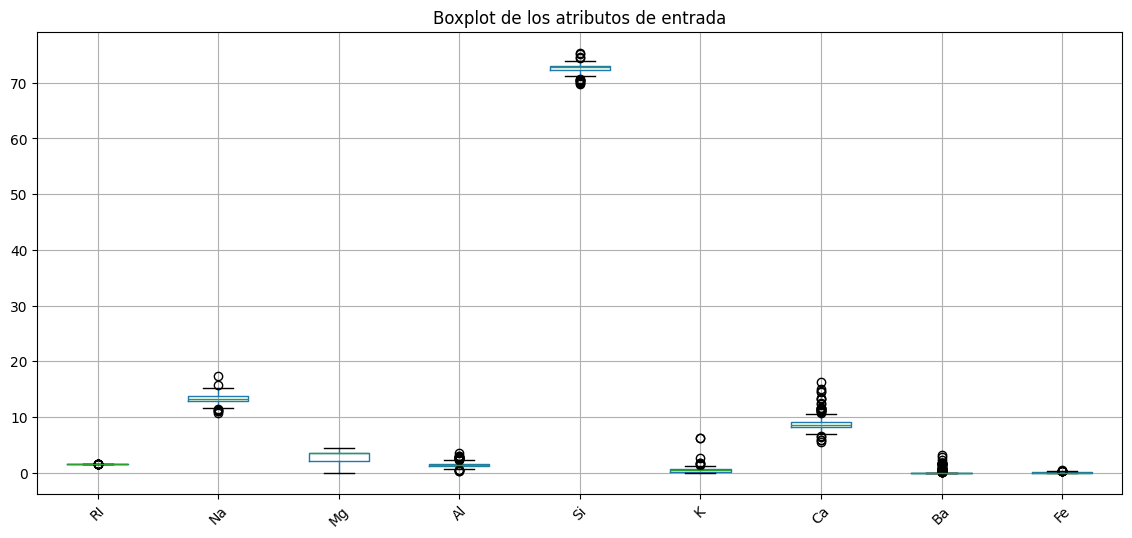

In [ ]:
plt.figure(figsize=(14,6))
df.drop("Type", axis=1).boxplot()
plt.xticks(rotation=45)
plt.title("Boxplot de los atributos de entrada")
plt.show()


Los diagramas de cajas y bigotes permiten identificar la dispersión de los datos y la presencia de posibles valores atípicos en varios atributos.


### 1.5 Diagrama de dispersión u otro acorde al tipo de atributo

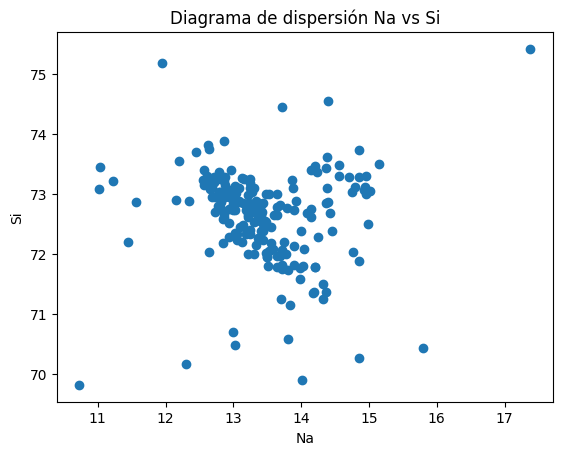

In [ ]:
plt.scatter(df["Na"], df["Si"])
plt.xlabel("Na")
plt.ylabel("Si")
plt.title("Diagrama de dispersión Na vs Si")
plt.show()


El análisis de dispersión entre Na y Si permite identificar la ausencia de dependencia fuerte entre ambos atributos, aportando evidencia de que la clasificación de los tipos de vidrio requiere un enfoque multivariado, en lugar de basarse en relaciones bivariadas simples.

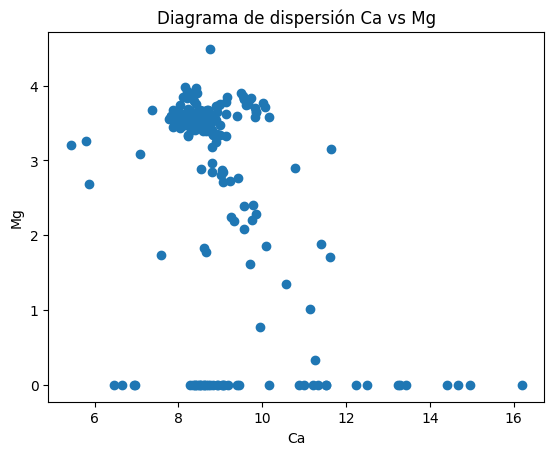

In [ ]:
plt.scatter(df["Ca"], df["Mg"])
plt.xlabel("Ca")
plt.ylabel("Mg")
plt.title("Diagrama de dispersión Ca vs Mg")
plt.show()


El análisis de dispersión entre Ca y Mg evidencia una relación negativa significativa y la posible existencia de distintos grupos composicionales, lo cual refuerza la necesidad de utilizar modelos multivariados para la identificación de los tipos de vidrio.

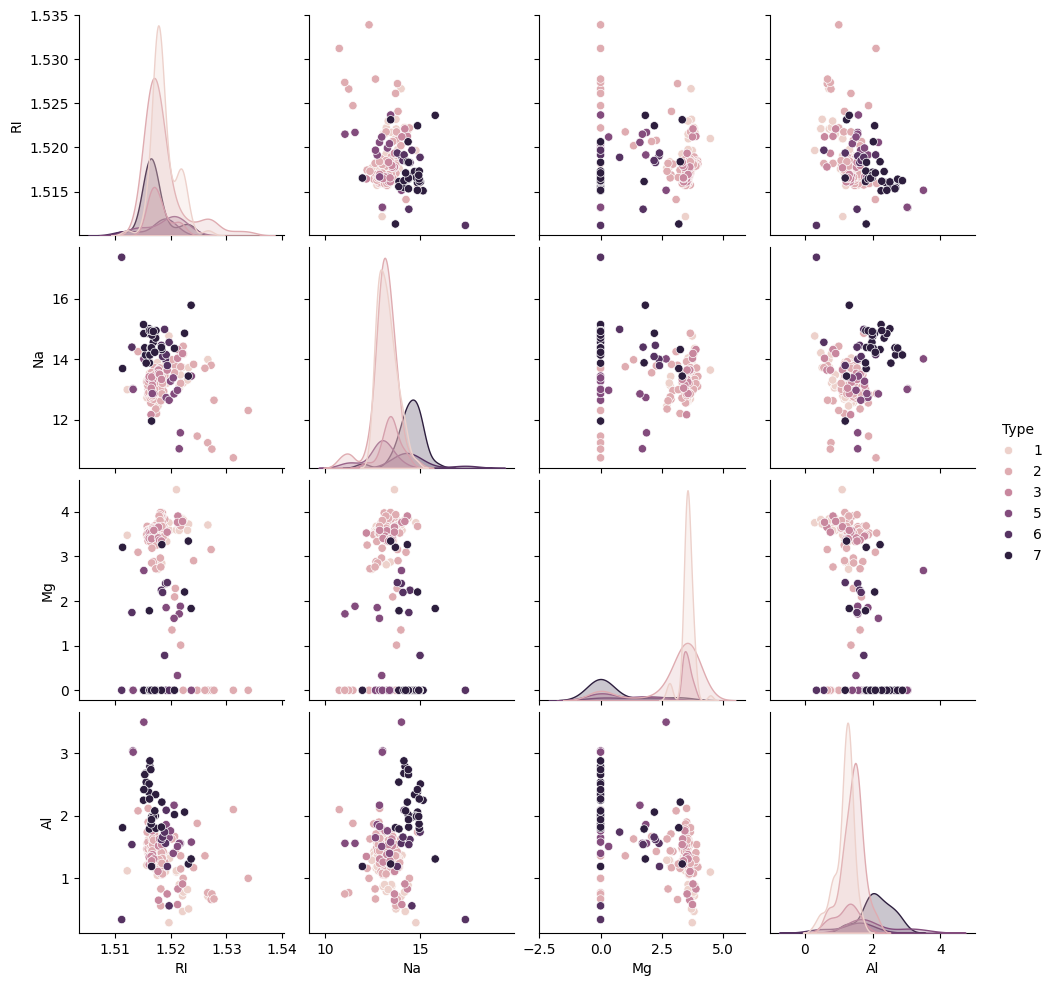

In [ ]:
sns.pairplot(df, vars=["RI", "Na", "Mg", "Al"], hue="Type")
plt.show()


### 1.6 Calcular la matriz de correlación entre los atributos de entrada

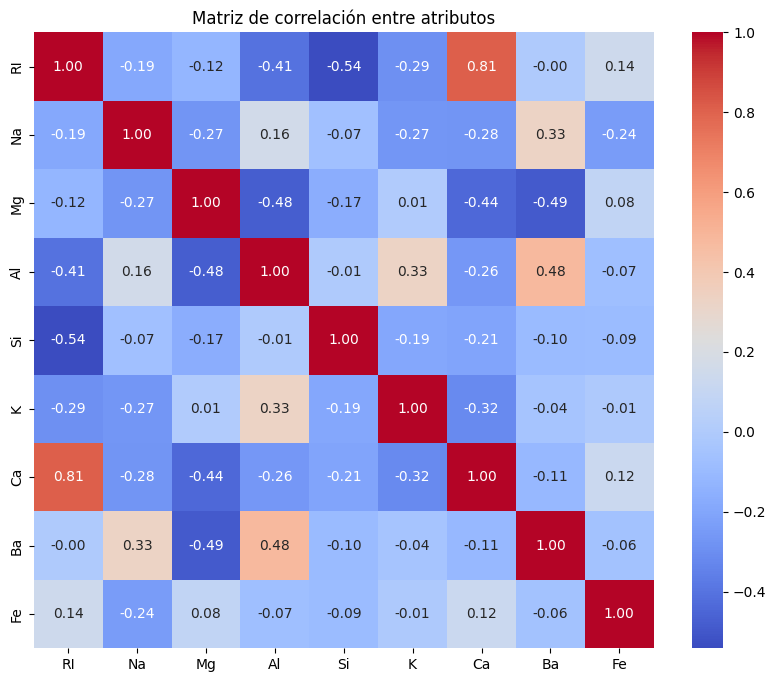

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(
    df.drop("Type", axis=1).corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Matriz de correlación entre atributos")
plt.show()


La matriz de correlación evidencia la existencia de relaciones lineales moderadas y altas entre algunos atributos, lo que sugiere posible redundancia de información.


### 1.7 Determinar el grado de balanceo entre los valores del atributo objetivo

In [ ]:
df["Type"].value_counts()

,count
Type,
2,76
1,70
7,29
3,17
5,13
6,9


In [ ]:
df["Type"].value_counts(normalize=True)


,proportion
Type,
2,0.355140
1,0.327103
7,0.135514
3,0.079439
5,0.060748
6,0.042056


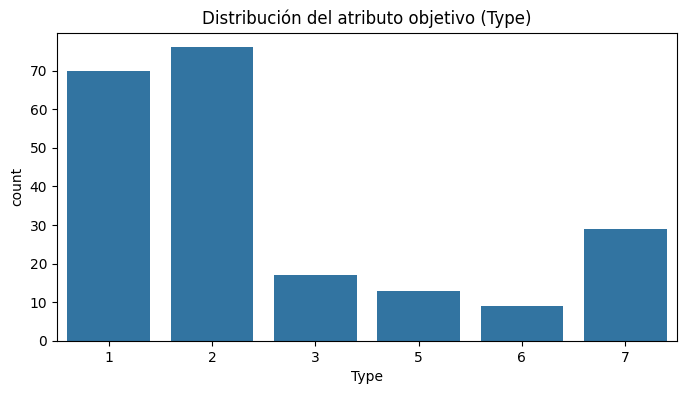

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x="Type", data=df)
plt.title("Distribución del atributo objetivo (Type)")
plt.show()


El atributo objetivo presenta un desbalance entre clases, donde las clases 1 y 2 concentran la mayoría de las muestras, mientras que otras clases tienen una representación reducida.


### 1.8 Identificar número de datos faltantes por clase

In [ ]:
df.isnull().sum()

,0
RI,0
Na,0
Mg,0
Al,0
Si,0
K,0
Ca,0
Ba,0
Fe,0
Type,0


In [ ]:
df.isnull().groupby(df["Type"]).sum()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
Type,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0


No se identificaron valores faltantes en ninguno de los atributos del conjunto de datos, ni de forma global ni por clase del atributo objetivo. Por tanto, no fue necesario aplicar técnicas de imputación o eliminación de registros en esta etapa.

### 1.9 Identificar número de datos atípicos por clase (PYOD)


In [ ]:
!pip install pyod

In [ ]:
from pyod.models.iforest import IForest

X = df.drop("Type", axis=1).values

detector = IForest(contamination=0.05, random_state=42)
detector.fit(X)
outliers = detector.predict(X)

df["outlier"] = outliers

In [ ]:
df.groupby("Type")["outlier"].value_counts()


Type  outlier
1     0          70
2     0          73
      1           3
3     0          17
5     0           9
      1           4
6     0           8
      1           1
7     0          26
      1           3
Name: count, dtype: int64

Se eligió Isolation Forest porque es un método no supervisado, adecuado para datos multivariados y numéricos, no requiere asumir distribuciones estadísticas previas y es eficiente para identificar valores atípicos en conjuntos de datos de tamaño medio como el dataset de vidrio.

Mediante el uso del algoritmo Isolation Forest se identificaron datos atípicos en varias clases del atributo objetivo.
La presencia de estos valores puede afectar el desempeño del modelo de clasificación, por lo que se tendrán en cuenta en la etapa de preparación de los datos.


## Conclusiones de la etapa de entendimiento

El análisis exploratorio del conjunto de datos permitió identificar un desbalance entre las clases del atributo objetivo, la presencia de valores atípicos y correlaciones entre algunos atributos de entrada.
No se identificaron valores faltantes.
Estos hallazgos justifican la aplicación de técnicas de preparación de los datos en la siguiente etapa con el fin de mejorar el desempeño del modelo de clasificación.


## Etapa 2: Preparación de los datos


En esta etapa se realizan distintas transformaciones sobre el conjunto de datos, basadas en los hallazgos obtenidos durante la etapa de entendimiento. El objetivo es evaluar cómo la limpieza y preparación de los datos impactan el desempeño de un modelo de aprendizaje automático.

Para este propósito, se entrena un clasificador de regresión logística sobre diferentes versiones del dataset, considerando la eliminación de datos faltantes, el tratamiento de datos atípicos, la reducción de correlación entre atributos, el balanceo de clases y la aplicación de técnicas de reducción de dimensionalidad como PCA.
El desempeño de cada modelo se evalúa utilizando la métrica de accuracy, permitiendo realizar una comparación objetiva entre las distintas versiones del conjunto de datos.